In [67]:
import pandas as pd
import copy
import time
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Preprocessing


In [68]:


dataset = pd.read_csv("housing.csv")
# dataset.head()
# dataset = dataset.fillna(dataset.median())
X = dataset.drop(columns=["median_house_value", 'ocean_proximity'])
y = dataset['median_house_value']



pd.get_dummies(dataset['ocean_proximity'])
X = pd.concat([X, pd.get_dummies(dataset['ocean_proximity'])], axis=1)

M, N = X.shape
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())


columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
scaler = StandardScaler()
X[columns] =  scaler.fit_transform(X[columns])
y = StandardScaler().fit_transform(dataset[['median_house_value']]).reshape((-1,))




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head()

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# print(X_train)

In [69]:
def predict(X, w, b):
    return np.dot(X, w) + b

def compute_mse(y, y_predicted):

    return np.square(y-y_predicted).mean()/2

def compute_mae(y, y_predicted):
    return np.absolute(y-y_predicted).mean()

def compute_r_square(y, y_predicted):
    m = y.shape[0]
    mean = y.mean()
    S_res = np.square(y-y_predicted).sum()
    S_tot = np.square(y-mean).sum()

    return 1-S_res/S_tot

W = np.zeros(X.shape[1])
b = 0.
    

In [70]:
import sys
def compute_gradient(X, y, w, b): 
    
    m,n = X.shape          
    dj_dw = np.zeros((n,))
    dj_db = 0.

    error = (np.dot(X, w)+b)-y
    dj_dw =np.dot(X.T, error)/m    
    dj_db = error.mean()
                       
        
    return dj_db, dj_dw


def gradient_descent(X, y, weights, bias, X_test, y_test, alpha=2e-1, epochs=1000):
    m, n = X.shape
    
    sys.stdout.flush()
    weights = copy.deepcopy(weights)

    y_predicted = predict(X, weights, bias)

    mse_costs= [compute_mse( y, y_predicted)]
    r2_score = [compute_r_square( y, y_predicted)]
    mae_costs = [compute_mae( y, y_predicted)]

    y_predicted_t = predict(X_test, weights, bias)

    mse_costs_t= [compute_mse(y_test, y_predicted_t)]
    r2_score_t = [compute_r_square( y_test, y_predicted_t)]
    mae_costs_t = [compute_mae( y_test, y_predicted_t)]

    sys.stdout.flush()

    time_taken = []
    start = time.time()

    for i in range(epochs):
        print(time.time()-start)

        dj_db, dj_dw = compute_gradient(X, y, weights, bias)

        sys.stdout.flush()
        # for j in range(n):
        #     weights[j] -= alpha*dj_dw[j]
        weights = weights- alpha*dj_dw
        bias = bias- alpha*dj_db

        

        y_predicted = predict(X, weights, bias)
        y_predicted_t = predict(X_test, weights, bias)
        

        mse_costs.append(compute_mse( y, y_predicted))
        r2_score.append(compute_r_square( y, y_predicted))
        mae_costs.append(compute_mae( y, y_predicted))

        mse_costs_t.append(compute_mse( y_test, y_predicted_t))
        r2_score_t.append(compute_r_square( y_test, y_predicted_t))
        mae_costs_t.append(compute_mae( y_test, y_predicted_t))

        
        time_taken.append(time.time()-start)


        print(weights, bias)
    return (mse_costs, mae_costs, r2_score), (mse_costs_t, mae_costs_t, r2_score_t), time_taken, weights, bias



#(mse_costs, mae_costs, r2_score), (mse_costs_t, mae_costs_t, r2_score_t), time_taken,
(mse_costs, mae_costs, r2_score), (mse_costs_t, mae_costs_t, r2_score_t), time_taken, W, b = gradient_descent(X_train, y_train,  W, b, X_test, y_test)






0.0
[-0.009897350095778277 -0.028388003249249144 0.02142179166361891
 0.027135278688834176 0.01016364115949498 -0.004911219146147633
 0.013216080754590376 0.13843479667905076 0.02607578237572769
 -0.04527104054357678 7.494942781539619e-05 0.010237595934886157
 0.009000820647711951] 0.00011810784256425263
0.027512550354003906
[-0.023216628853212275 -0.047992673908773306 0.04344889039259359
 0.04164268312116712 0.012964047245995295 -0.017107220995592625
 0.018212982896410802 0.24651698194172358 0.04643427823423845
 -0.08333269667286511 0.00015295708529803356 0.019750003218744698
 0.0172516038420294] 0.0002561457074453354
0.05979156494140625
[-0.03716314524157327 -0.06255786095293978 0.06305389948270143
 0.05139942201356039 0.015241382266308185 -0.029806642313326706
 0.022005453977455874 0.33124876747145926 0.06268919763954425
 -0.1155944763679204 0.00023278752471650864 0.02830321886039896
 0.024892469526012935] 0.0005231971827520403
0.10135817527770996
[-0.05062643584220419 -0.0739759571

In [71]:
print(W, b)

[-0.45843557885952757 -0.460063438336286 0.12078729611358162
 -0.10914089138746759 0.37706082199881447 -0.36805887050050884
 0.14712243214233178 0.6458460004536413 0.08457335173618431
 -0.27196389185625336 0.0705443270154018 0.03333235976669087
 0.11278710206935413] 0.029273248731377374


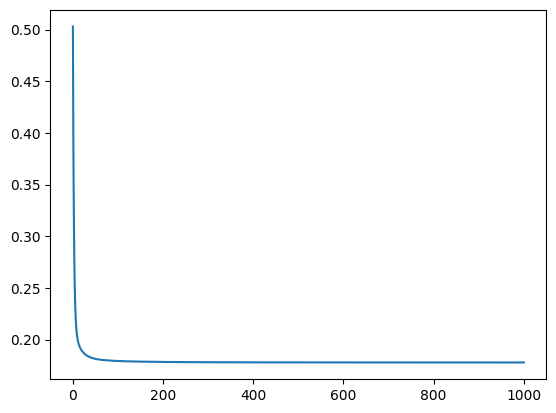

In [72]:
plt.plot(mse_costs)

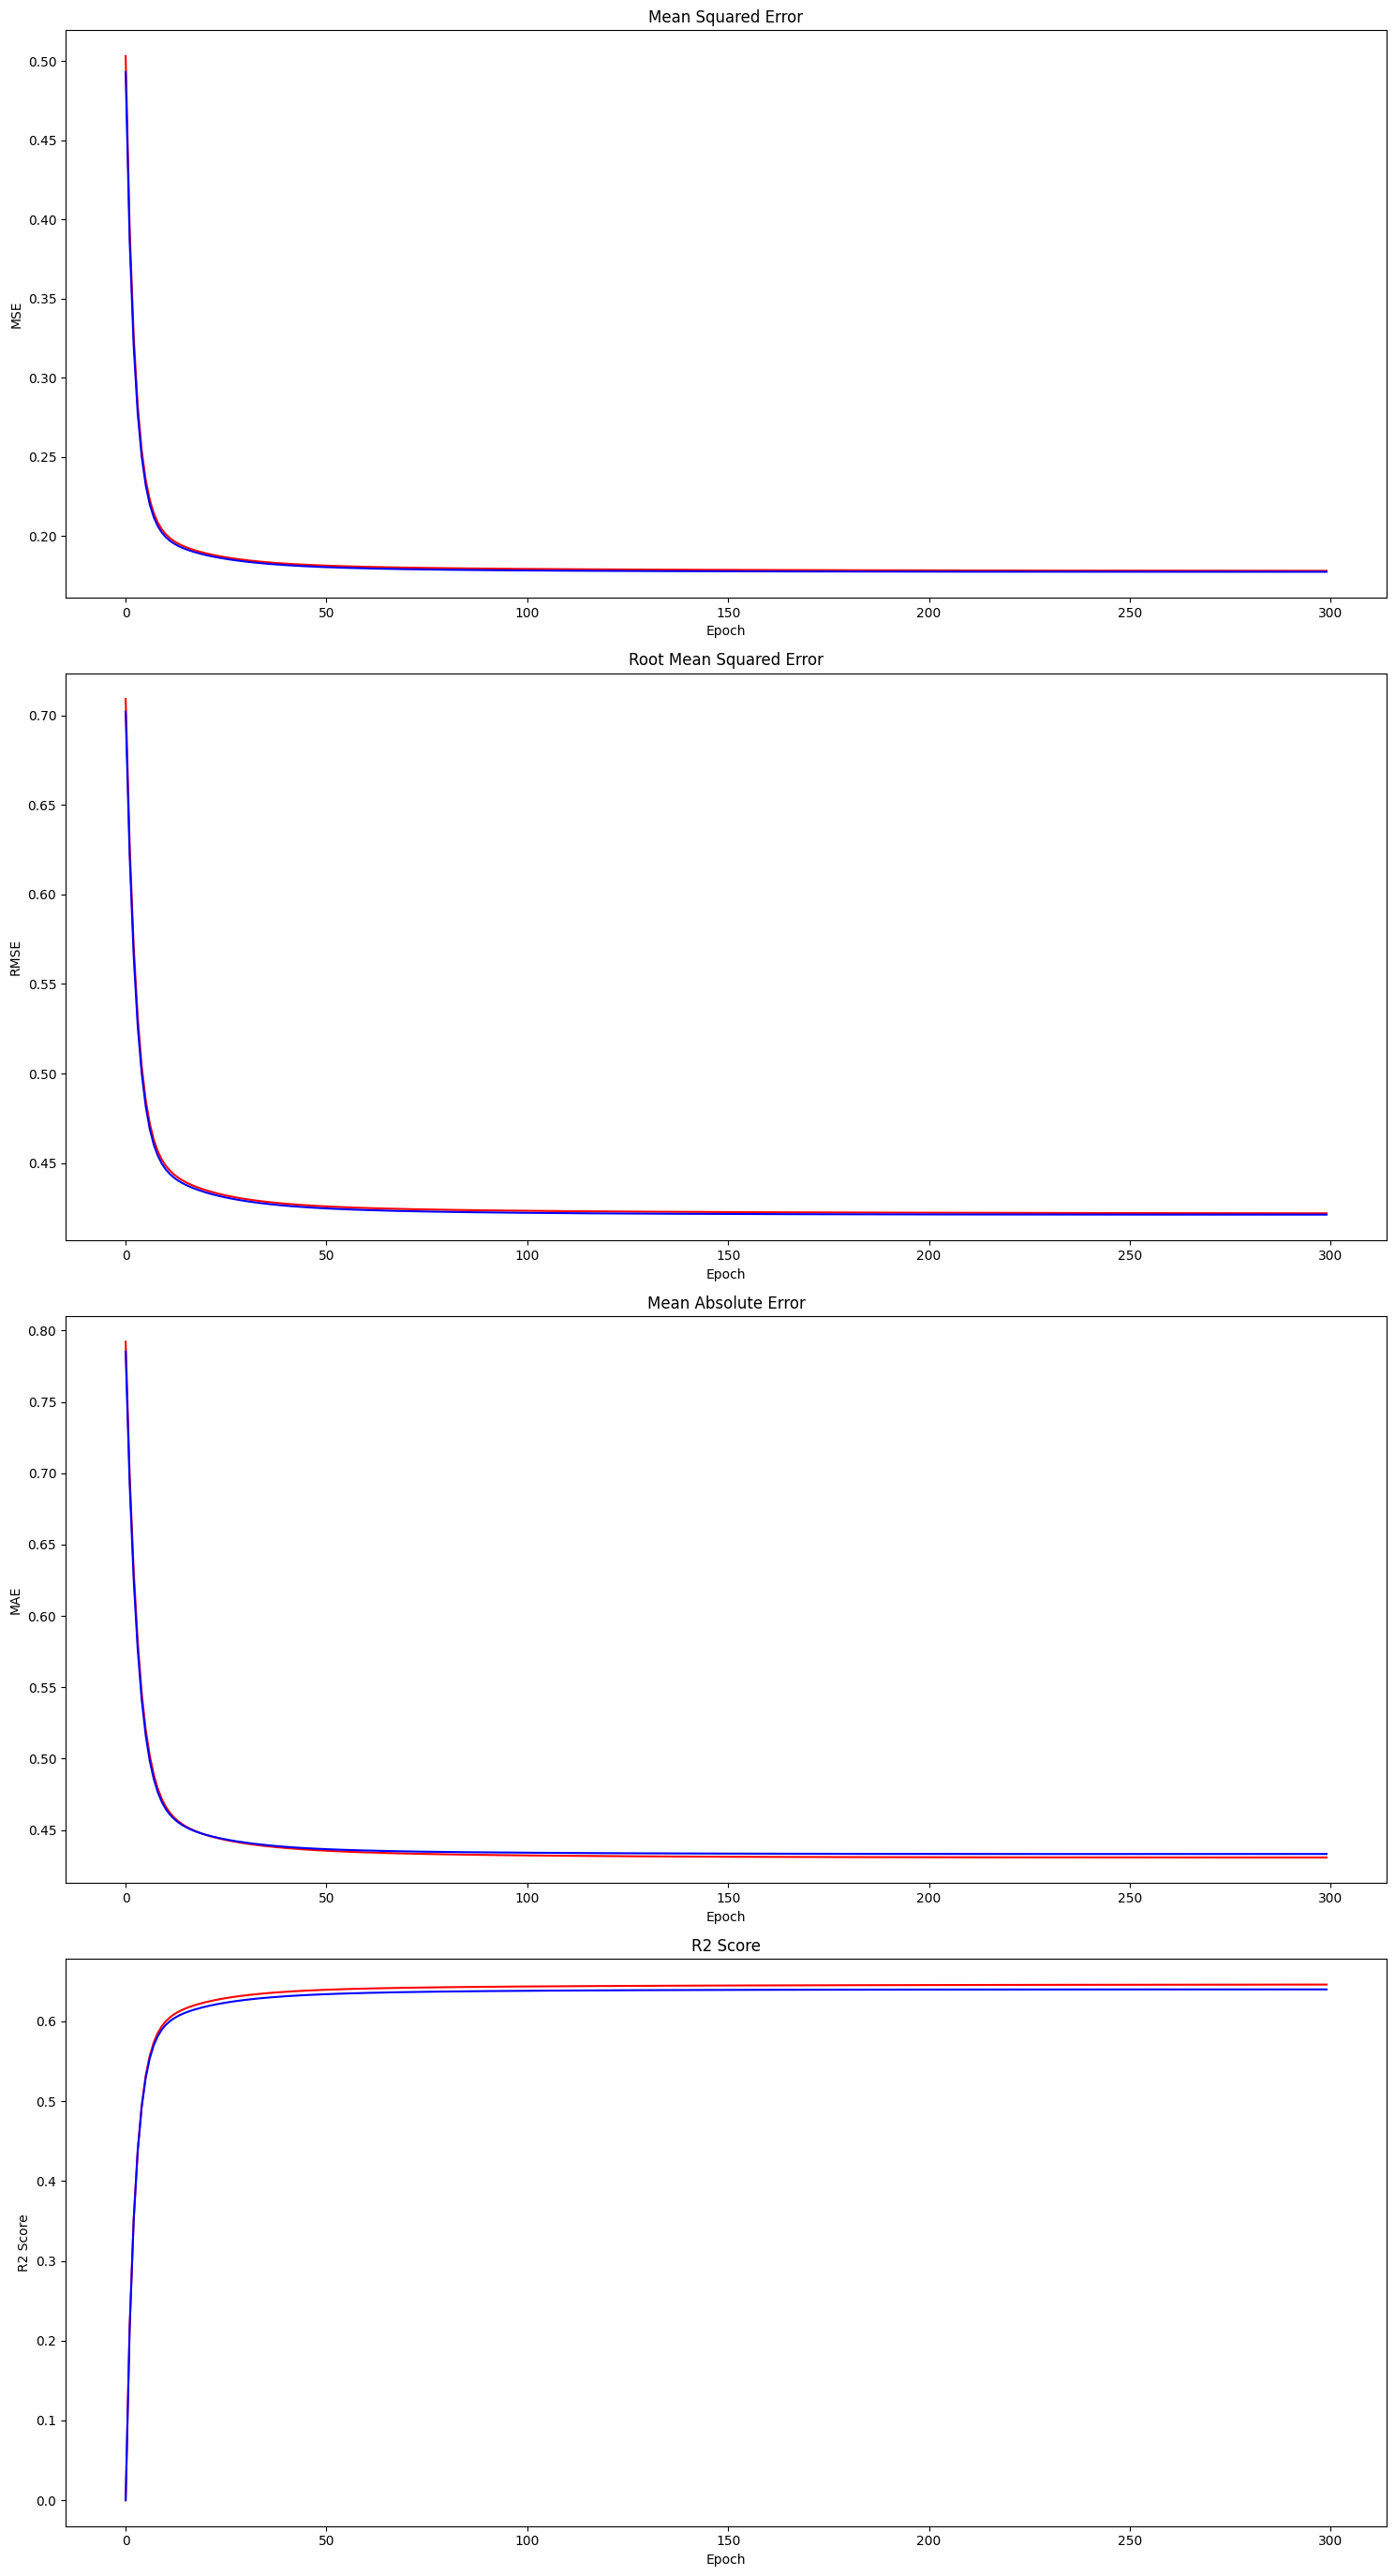

In [73]:
fig, axs = plt.subplots(4, 1, figsize=(15, 30))


axs[0].plot(mse_costs[:300], 'r')
axs[0].plot(mse_costs_t[:300], 'b')
axs[0].set_title("Mean Squared Error")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("MSE")


axs[1].plot([i**0.5 for i in mse_costs[:300]], 'r')
axs[1].plot([i**0.5 for i in mse_costs_t[:300]], 'b')
axs[1].set_title("Root Mean Squared Error")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("RMSE")


axs[2].plot(mae_costs[:300], 'r')
axs[2].plot(mae_costs_t[:300], 'b')
axs[2].set_title("Mean Absolute Error")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("MAE")


axs[3].plot(r2_score[:300], 'r')
axs[3].plot(r2_score_t[:300], 'b')
axs[3].set_title("R2 Score")
axs[3].set_xlabel("Epoch")
axs[3].set_ylabel("R2 Score")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [79]:
print(mae_costs[-1])

0.4311229383981411


In [81]:
time_taken[300]

10.335747241973877